**Junnan Shimizu**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 4a: Pandas and Principle Component Analysis

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [8,8]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

/var/folders/b_/0p9b6l2s6x13bk377kvjypbm0000gn/T/ipykernel_28017/2394358706.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/b_/0p9b6l2s6x13bk377kvjypbm0000gn/T/ipykernel_28017/2394358706.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


 

## Task 1:  Introduction to Pandas

We are going to be using Pandas, covariance matrices and principle component analysis to explore a dataset on breast cancer diagnosis data. More information about the dataset can be found [here.](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url:  https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv 
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation:
    1. In one method call get the shape and print the results.
    2. To get the column headers and print them.
    3. In one method call get the first 5 items and print the results.
    4. Find the mean of each column
3. Create a `cancer_x` dataframe which includes columns 2-11 (radius_mean - fractal_dimension_mean).
4. Update `cancer_x` to be normalized from 0-1, by subtracting by the minimum and dividing by the range. 
5. Create a `cancer_y` series with from the column `diagnosis` and set it to be [lowercase](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html)


In [2]:
url="https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"

data = pd.read_csv(url)

print(data.shape)
print(data.columns)
print(data.head)
print(data.mean)

cancer_x = data.iloc[:, 2:12]
cancer_x = (cancer_x - cancer_x.min()) / (cancer_x.max() - cancer_x.min())

cancer_y = data['diagnosis'].str.lower()

NameError: name 'pd' is not defined

## Task 2: Create and Visualize a Covariance Matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the pairwise covariance of the `cancer_x` columns, store the resulting covariance matrix, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`
        1. If necessary, rotating the text for the x-axis using `setp`
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a [colorbar](https://matplotlib.org/3.1.1/gallery/axes_grid1/simple_colorbar.html).
    
**Question:** What interpretations can you draw from this covariance matrix?

(10, 10)


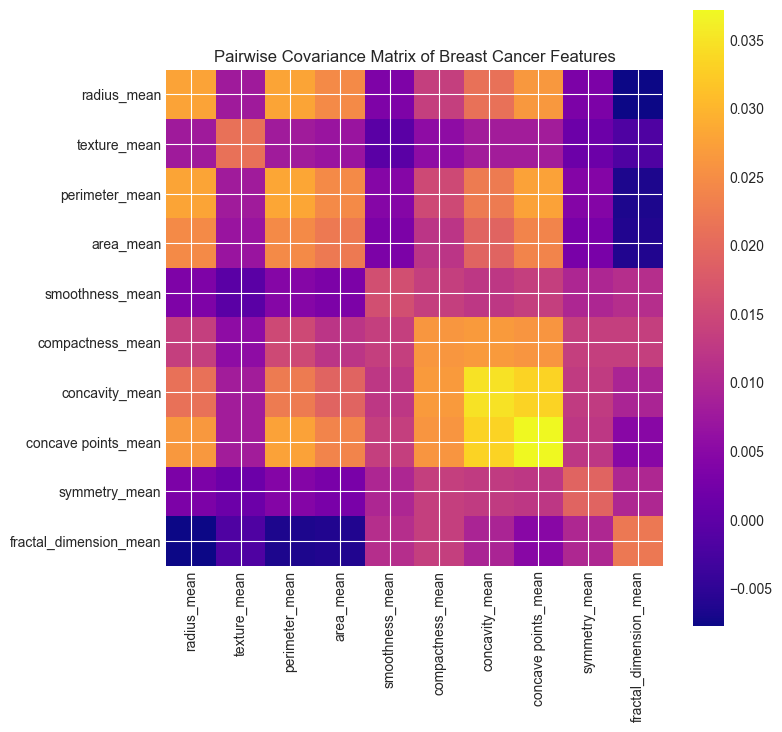

In [25]:
cov_matrix = cancer_x.cov()
print(cov_matrix.shape)

plt.imshow(cov_matrix, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(cancer_x.columns)), cancer_x.columns, rotation=90)
plt.yticks(range(len(cancer_x.columns)), cancer_x.columns)
plt.title('Pairwise Covariance Matrix of Breast Cancer Features')
plt.show()

## Task 3: Visualizing Principle Component Analysis

### 3a) Principle Component Analysis
1. Use [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) to compute the eigenvalues and right eigenvectors of the covariance matrix.  
1. Print the eigen_values and the first 2 eigenvectors.
2. Transform the data with the eigen_vectors.
    1. Matrix multiply cancer_x with the first two columns of the eigen_vectors. 
    2. Print the first 5 rows of the transformed data.

**Question:**  Which 2 variables are the first eigenvector most dependent on?  How does that relate to the heatmap?

Concavity mean and concave points_mean. As you can see, on the heat map, those two varaibles have the highest covariance.

In [32]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print('Eigenvalues:\n', eigenvalues)
print('Eigenvectors:\n', eigenvectors[:, :2])

transform = np.dot(cancer_x, eigenvectors[:, :2])
print('Transformed Data:\n', transform[:5, :])

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1.335070 -1.286536
4 -1.364975 -0.036868
-----------------------------------
''')

Eigenvalues:
 [0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121
 0.00206]
Eigenvectors:
 [[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed Data:
 [[-1.69205 -0.74676]
 [-1.10577  0.15841]
 [-1.47931 -0.15926]
 [-1.33507 -1.28654]
 [-1.36498 -0.03687]]

-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1

### 3b) Graph a scatterplot of the transformed data

Graph a scatterplot of the transformed data using [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.scatter.html)
1. Scatter Parameters
    1. Graph the first principle component on the x axis (first column of the tranformed data)
    2. Graph the second principle component on the y axis (second column of the tranformed data)
    3. Use the `cancer_y` series for the color with a black edgecolor
3. Include a title, and axis labels.
4. Add a custom [legend](https://matplotlib.org/3.3.3/tutorials/intermediate/legend_guide.html) using mpatches.
    1. Create 1 patch with the color `m` for malignant
    1. Create 1 patch with the color `b` for benign

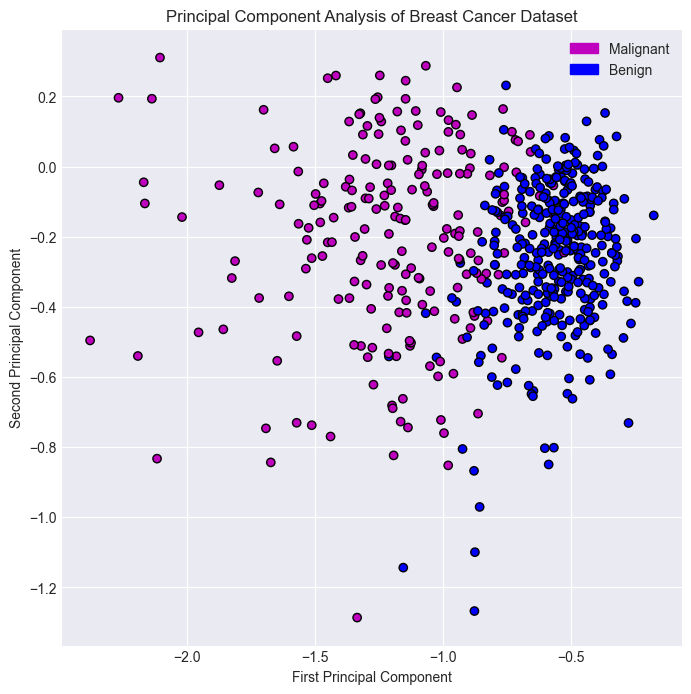

In [41]:
import matplotlib.patches as mpatches

plt.scatter(transform[:, 0], transform[:, 1], c=cancer_y, edgecolor='black')

plt.title('Principal Component Analysis of Breast Cancer Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

m_patch = mpatches.Patch(color='m', label='Malignant')
b_patch = mpatches.Patch(color='b', label='Benign')
plt.legend(handles=[m_patch, b_patch])